
# Autoregresive Time Series

---
> Erick Eduardo Aguilar Hernández:
> * mat.ErickAguilar@ciencias.unam.mx
> * isc.ErickAguilar@gmail.com
---

#  Autoregresive Model
___


A time series is a sequence of measurements of the same variable made over time. Usually the measurements are made at evenly spaced times, for example, monthly or yearly. Let us first consider the problem in which we have a y variable measured as a time series. As an example, we might have y a measure of global temperature.


The models that will be used are based on the idea proposed by Yule (1924) that a time series is expressed as a succession of highly dependent values that are considered to be generated by a series of independent shocks and a linear combination of the values observed previously. With this idea in mind the autoregressive time series model of order k, $AR(k)$ is defined as:


$$
X_{t} = \phi_1 X_{t-1} +  \phi_2 X_{t-2} + ... +  \phi_k X_{t-k} + \varepsilon_t
$$

Where: 
* $\phi_i$: It's a real coefficient.
* $X_{t-i}$: It's the value of the process at "time" $t-i$ for $1 \leq i \leq k$ 
* $\varepsilon_t$: It's and uncorrelated normal variable $N(0,\sigma^2)$

## AR(1) model

___


The AR(1) model it's the process given by the following recursion:

$$
X_t = \phi_1 X_{t-1} + \varepsilon_t
$$


#### AR(1) model stationarity conditions:
For $\{Xt\}$ process the stationarity conditions indicates that $E[X_t]=E[X_{t-k}]$ and $E[X_t^2]=E[X_{t-k}^2]$, a natural question is try to determine how should be $\phi_1$ such that a process $X_t \sim AR(1)$ it's stationary. For a initial fixed value $X_0$

$$
\begin{align*}
    X_1 &= \phi_1 X_0 + \varepsilon_1 \\
    X_2 &= \phi_1 X_1 + \varepsilon_2 \\
        &= \phi_1 (\phi_1 X_0 + \varepsilon_1) + \varepsilon_2   \\
    X_2 &= \phi_1^2 X_0 + \phi_1 \varepsilon_1 + \varepsilon_2   \\
    X_3 &= \phi_1 X_2 + \varepsilon_3 \\
        &= \phi_1 (\phi_1^2 X_0 + \phi_1 \varepsilon_1 + \varepsilon_2) + \varepsilon_3 \\
        &= \phi_1^2 X_0 +  \phi_1^2 \varepsilon_1 + \phi_1 \varepsilon_2 + \varepsilon_3\\
    \vdots &= \vdots \\
    X_t    &= \phi_1^t X_0 +  \phi_1^{t-1} \varepsilon_1 + \phi_1^{t-2} \varepsilon_2 + \dots + \varepsilon_t\\
    X_t       &= \phi_1^t X_0 + \sum_{i=1}^t \phi_1^{t-i} \varepsilon_i \\
\end{align*}
$$

Note $E[X_t]=c$ constant if the process $X_t$ dont diverges when $t \to \infty$ , i.e. the booth terms of the sum are finite.   

$$
lim_{t \to \infty}\sum_{i=1}^t \phi_1^{t-i} \varepsilon_i < \infty \implies lim_{t \to \infty}\sum_{i=1}^t \phi_1^{t-i} = c_1  \implies  lim_{t \to \infty}\sum_{i=1}^t \phi_1^{t-i} = \frac{1}{1-\phi_1} \\
\implies |\phi_1| < 1 \implies \phi_1^t X_0 \to 0\\
$$

#### AR(1) mean and variance

Lets $X_t \sim AR(1)$ starionary, $c$ a shifte value then:

$$
\begin{align*}
X_t &= c+\phi X_{t-1} + \varepsilon_t \\
E [X_t] &= E[c+\phi_1 EX_{t-1}+ \varepsilon_t ] \\
E [X_t] &= c+\phi_1 E[X_t] \\
E [X_t] -\phi_1 E[X_t] &= c \\
E [X_t] (1 - \phi_1 B)&= c \\
\implies  E [X_t] (1 - \phi_1) &= c \\
\implies  E [X_t] &= \frac{c}{1 - \phi_1} \\
\end{align*}
$$

So if $X_t$ it's an $AR(1)$ stationary then $E[X_t]=\mu$ constant.


$$
\begin{align*}
X_t-\mu &= \phi (X_{t-1}-\mu) + \varepsilon_t \\
E [X_t-\mu]^2 &= E[\phi (X_{t-1}-\mu) + \varepsilon_t]^2 \\
E [Z_t^2] &= E[\phi Z_{t-1} + \varepsilon_t]^2 \\
E [Z_t^2] &= E[\phi Z_{t-1} + \varepsilon_t]^2 \\
E [Z_t^2] &= E[\phi^2 Z_{t-1}^2 +2 \phi  Z_{t-1} \varepsilon_t^2 + \varepsilon_t^2] \\
E [Z_t^2] &= \phi^2 E[ Z_{t-1}^2] +2 \phi E[Z_{t-1} \varepsilon_t^2] + E[\varepsilon_t^2]  \\
E [Z_t^2] &= \phi^2 E[ Z_t^2]+ \sigma^2  \\
E [Z_t^2] - \phi^2 E[ Z_t^2] &= \sigma^2  \\
E [Z_t^2] (1-\phi^2) &= \sigma^2  \\
E [Z_t^2] &= \frac{\sigma^2}{1-\phi^2} = V[X_t]\\
\end{align*}
$$

For any stationary process a consistent estimator for the mean is:

$$
\bar{X}_t = \sum_{t=1}^n X_t\\
$$


**Example** Generating and AR(1) process

In [1]:
run tsUtils.py

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
def processAR1(sigma2,n,phi,x0=0):
    Xt = [x0]
    et = np.random.normal(0,sigma2,n)
    for t in range(1,n):
        Xt.append(phi*Xt[t-1]+et[t])
    AR_1 = pd.DataFrame(Xt,columns=['Xt'])
    return AR_1

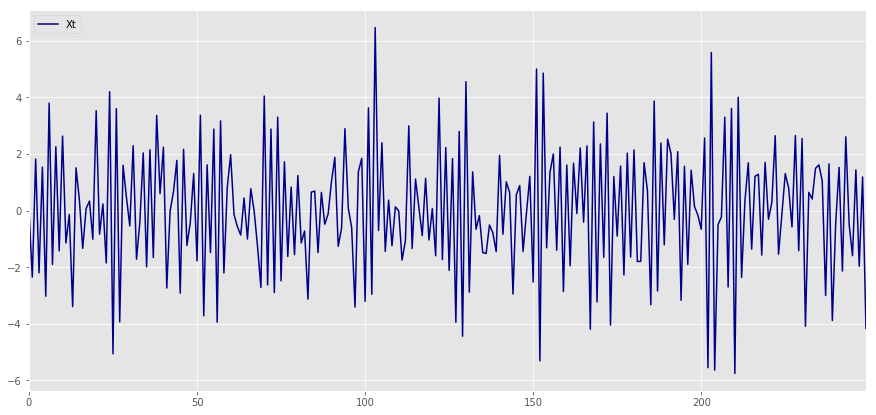

In [4]:
AR_1 = processAR1(sigma2=1.5,phi=-0.7,n=250,x0=0)
plotTimeSeries(AR_1)

#  Autocovariance and autocorrelation functions

___

In genereral recalling for a stationary process there are two important functions:

* *Autovariance function:* $\gamma(X_t,X_{t+k})=E[(X_{t}-\mu_{t})(X_{t+k}-\mu_{t+k})]=Cov(X_t-\mu_t,X_{t-k}-\mu_t)$
* *Autocorrelation function:* $\rho(X_t,X_{t+k})=\frac{\gamma(X_t,X_{t+k})}{\sqrt{V[X_t]}\sqrt{V[X_{t+k}]}}=\frac{\gamma(k)}{\gamma(0)}$

If the process is stationary then, both function only depends of the time difference of the observations.

$$
\gamma(X_t,X_{t-k})= \gamma(k)\\
\rho(X_t,X_{t-k}) = \rho(k)\\
$$

### Autocovariance and autocorrelation for AR(1)

$$
\begin{align*}
\gamma(X_t,X_{t-k}) &= E[(X_t-\mu)(X_{t-k}-\mu)]\\
&= E[(Z_t)(Z_{t-k})] \\
&= E[(\phi Z_{t-1}+\varepsilon_t)(Z_{t-k})] \\
&= E[\phi Z_{t-1} Z_{t-k}+\varepsilon_t Z_{t-k}] \\
&= \phi E[Z_{t-1} Z_{t-k}]+E[\varepsilon_t Z_{t-k}] \\
\gamma(k) &= \phi \gamma(k-1)\\
\end{align*}
$$

This equation shows that since $|\phi| < 1$ the dependence between observation decreases when the lag increases. Observation $\gamma(0) = V[X_t]$. then.

$$
\begin{align*}
\gamma(1) &= \phi \gamma(0)\\
\gamma(1) &= \frac{\phi \sigma^2}{1-\phi^2}\\
\end{align*}
$$

So the autocorrelation it's:

$$
\begin{align*}
\rho(k) &= \frac{\gamma(k)}{\gamma(0)}\\
 &= \frac{\phi \gamma(k-1)}{ \rho(0)}\\
 &=  \phi \rho(k-1) \\
\implies \rho(1) &=  \phi \rho(0)  = \phi\\
\implies \rho(k) &= \phi^k \\
\end{align*}
$$

The las expression shows that the autocorrelation function of an AR(1) process is equal to the powers of the AR parameter of the process and decreases geometrically to zero.

Autocorrelations contain the same information as the autocovariances, with the advantage of not depending on the units of measurement. From here on we will use the term simple autocorrelation function (ACF) to denote the
autocorrelation function of the process in order to differentiate it from other functions linked to the autocorrelation. An interpetation of the autoccorelation its the level of linear dependency that the series have at time $t$ respect to the $t-k$.

## Partial autocorrelation


Partial autocorrelations cover this limitation. As is known, the partial autocorrelation between two variables measures the relationship existing linear between them keeping the presence of other variables constant or excluding their linear influence. Consider the following time series with strong linear dependency.

$$X_{t} = \phi_{k1} X_{t-1}+ \phi_{k2} X_{t-2}+ ... +\phi_{kk} X_{t-k}$$


A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed. The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags. Introductory Time Series with R.

The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps. It is these indirect correlations that the partial autocorrelation function seeks to remove. Without going into the math, this is the intuition for the partial autocorrelation.

Given a time series, the partial autocorrelation of lag k, denoted $\phi_{k,k}$ is the autocorrelation between $X_t$ and $X_{t-k}$ with the linear dependence of $X_t$ on $X_{t-k}$ throught that is not accounted for by lags 1 to $k$ inclusive it's defined as:


$$
\begin{align*}
\phi_{kk}&=Corr(X_t,X_{t-k}|X_{t-1},...,X_{t-k+1})
\end{align*}
$$


Consider the process $X_t$ with $E[X_t]=0$. 

$$
\begin{align*}
    X_{t} &= \phi_{k1} X_{t-1}+ \phi_{k2} X_{t-2}+ ... +\phi_{kk} X_{t-k} \\
    X_{t-j} X_{t} &= X_{t-j} (\phi_{k1} X_{t-1}+ \phi_{k2} X_{t-2}+ ... +\phi_{kk} X_{t-k}) \\
  X_{t-j} X_{t} &= \phi_{k1} X_{t-j}  X_{t-1}+ \phi_{k2} X_{t-j}  X_{t-2}+ ... +\phi_{kk} X_{t-j}  X_{t-k} \\
  E[X_{t-j} X_{t}] &= \phi_{k1}E[X_{t-j}X_{t-1}]+\phi_{k2}E[X_{t-j}X_{t-2}]+ ... +\phi_{kk}E[X_{t-j}X_{t-k}] \\
  \gamma(j) &= \phi_{k1}\gamma(j-1)+\phi_{k2}\gamma(j-2)+ ... +\phi_{kk}\gamma(j-k)\\
\implies \rho(j) &= \phi_{k1}\rho(j-1)+\phi_{k2}\rho(j-2)+ ... +\phi_{kk}\rho(j-k)\\
\end{align*}
$$

For $j \in \{1,2,3,...,k\}$ the following system equations its derived.
$$
\begin{cases} 
      \rho(1) &= \phi_{11}\rho(0)+\phi_{22}\rho(1)+ ... +\phi_{kk}\rho(k-1)\\
      \rho(2) &= \phi_{11}\rho(1)+\phi_{22}\rho(0)+ ... +\phi_{kk}\rho(k-2)\\
      \vdots  &= \vdots \\
      \rho(k) &= \phi_{11}\rho(k-1)+\phi_{22}\rho(k-2)+ ... +\phi_{kk}\rho(0)\\
\end{cases}
$$

The last system of equations could be transformed in to matrix equation:

$$
\begin{align*}
\begin{bmatrix} 
      \rho(1) \\
      \rho(2) \\
      \vdots \\
      \rho(k)\\
\end{bmatrix} &=
\begin{bmatrix} 
      \rho(0)&\rho(1)& ... &\rho(k-1)\\
      \rho(1)&\rho(0)& ... &\rho(k-2)\\
      \vdots & \vdots & & \vdots  \\
      \rho(k-1)&\rho(k-2)& ... &\rho(0)\\
\end{bmatrix}
\begin{bmatrix} 
      \phi_{k1} \\
      \phi_{k2} \\
      \vdots \\
      \phi_{kk}\\
\end{bmatrix} \\
&= \begin{bmatrix} 
      1&\rho(1)& ... &\rho(k-1)\\
      \rho(1)&1& ... &\rho(k-2)\\
      \vdots & \vdots & & \vdots  \\
      \rho(k-1)&\rho(k-2)& ... &1\\
   \end{bmatrix} 
    \begin{bmatrix} 
          \phi_{k1} \\
          \phi_{k2} \\
          \vdots \\
          \phi_{kk}\\
    \end{bmatrix} \\   
   \\
\mathbf{\rho} &= \mathbf{R \Phi}  \\
\end{align*}
$$

This marix provides a convenient recursion for computing the pacf $\phi(k)$ using the cramer rule:

$$
\begin{align*}
\phi_{11}&=\rho(1)\\
\phi_{22}&=
\frac{
    \begin{vmatrix}
        1 & \rho(1) \\
        \rho(1) & \rho(2)\\
    \end{vmatrix}
}{
    \begin{vmatrix}
        1 & \rho(1) \\
        \rho(1) & 1\\
    \end{vmatrix}
}=\frac{\rho2-\rho(1)^2}{1-\rho(1)^2}\\
\phi_{33}&=
\frac{
    \begin{vmatrix}
        1 & \rho(1)  & \rho(1)\\
        \rho(1) & 1 & \rho(2)\\
        \rho(2) & \rho(1)  & \rho(3)\\
    \end{vmatrix}
}{
    \begin{vmatrix}
        1 & \rho(1)  & \rho(2)\\
        \rho(1) & 1 & \rho(1)\\
        \rho(2) & \rho(1)  & 1\\
    \end{vmatrix}
}\\
\vdots\\
\phi_{kk}&=
\frac{
    \begin{vmatrix}
        1 & \rho(1)  & \rho(2) & \dots & \rho(k-2)  & \rho(1)\\
        \rho(1) & 1 & \rho(1) & \dots & \rho(k-3)  & \rho(2)\\
        \vdots & \vdots & \vdots &  & \vdots & \vdots \\
        \rho(k-1) & \rho(k-2)  & \rho(k-3)  & \vdots& \rho(1) & \rho(k) \\
    \end{vmatrix}
}{
    \begin{vmatrix}
        1 & \rho(1)  & \rho(2) & \dots & \rho(k-2)  & \rho(k-1)\\
        \rho(1) & 1 & \rho(1) & \dots & \rho(k-3)  & \rho(k-2)\\
        \vdots & \vdots & \vdots &  & \vdots & \vdots \\
        \rho(k-1) & \rho(k-2)  & \rho(k-3)  & \vdots& \rho(1) & 1 \\
    \end{vmatrix}
}\\
\end{align*}
$$


## Sample autovariance, autocorrelations and partial autocorrelations


The consistent estimators for the autocovariance and the autocorrelations functions it's given by the following statistics.

$$
\hat{\gamma}(k) = \frac{1}{n} \sum_{t=1}^{n-k} (X_t-\bar{X})(X_{t+k}-\bar{X}) \\
\hat{\rho}(k) = \frac{\sum_{t=1}^{n-k} (X_t-\bar{X})(X_{t+k}-\bar{X})}{\sum_{t=1}^{n} (X_t-\bar{X})^2}
$$

The estimation of $\phi_{kk}$ could be obtained substituding $\hat{\rho}(k)$ in to the last matrix equation. Instead of calculating the complicated determinants for a large $k$ a recursive method starting with  $\phi_{11} = \rho(k)$ for computing $\phi_kk$ has been given by durbun in 1960:

$$\hat{\phi}_{kk} = \frac{\hat{\rho}(k+1)-\sum_{i=1}^k \hat{\phi}_{kj}\hat{\rho(k+1-j)}}{1-\sum_{j=1}^k\hat{\phi_{kj}\hat{\rho}(j)}}\\
\hat{\phi}_{k+1,j} = \hat{\phi}_{kj}-\hat{\phi}_{k+1,k+1}\hat{\phi}_{k,k+1-j} \quad j=1,2,...,k.
$$

## ACF and PACF sample errors

For a large n and for k > m, $\hat{p}(k)$ is approximately normal distributed with mean $\rho(k)$ and variance:

$$
V[\hat{\rho}(k)] \approx \frac{1}{n} (1+2\rho(1)^2+...+2\rho(m)^2)
$$

This result is know as Bartlett approximation. So under the hypotesis that the process is a white noise sequence, the standar error of $\hat{\rho}(k)$ can be aproximated by:

$$
S_{\hat{\rho}(k)} = \sqrt{\frac{1}{n}}
$$


An analogous result was provided by Quenoulli for the sample partial autocorrelations $\hat{\phi}_{kk}$.

$$
V[\hat{\phi}_{kk}] \approx \frac{1}{n} \implies S_{\hat{\phi}_{kk}} = \sqrt{\frac{1}{n}}
$$

The following condifence intervals can be used as critical limit for $\hat{\rho(k)}$ and $\hat{\phi}_{kk}$ to test the hypotesis that the process it's a white noise.

$$
\left[-z_{1-\alpha}\sqrt{\frac{1}{n}},z_{1-\alpha}\sqrt{\frac{1}{n}} \right]
$$


## Ljung Box test

It is common to use a Ljung-Box test to check that the residuals from a time series model resemble white noise. However, there is very little practical advice around about how to choose the number of lags for the test.

$$Q^* = T(T+2)\sum_{k=}^h (T-k)^{-1} \hat{\rho}(k)^2$$

Where T is the length of the time series, $\hat{\rho}(k)$ is the k th autocorrelation coefficient of the residuals, and $h$ is the number of lags to test. Large values of $Q^*$ indicate that there are significant autocorrelations in the residual series. It can be tested against a $\chi^2(h−k)$ with $h−k$ degrees of freedom where $k$ is the number of parameters estimated in the model.

**Example:** 

Sample autocovariance and autocorrelations for AR(1): $X_t = 0.9 X_{t-1}+\varepsilon_t$.

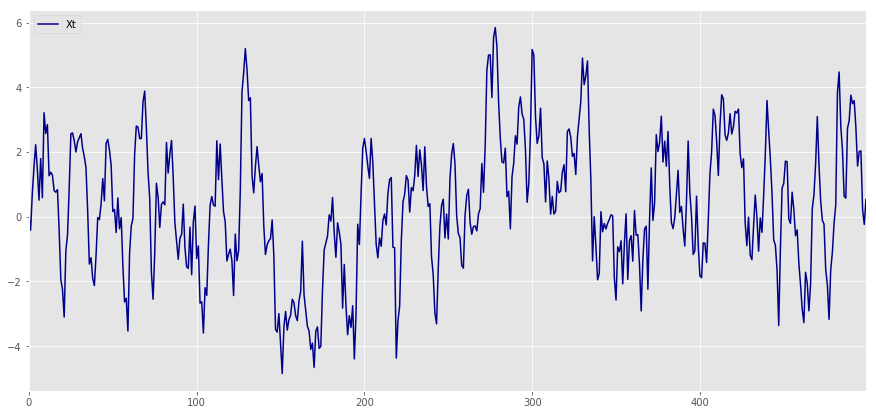

,Xt,Xt_1
0,0.000000,-0.417425
1,-0.417425,0.716504
2,0.716504,1.532009
3,1.532009,2.222290
4,2.222290,1.471013


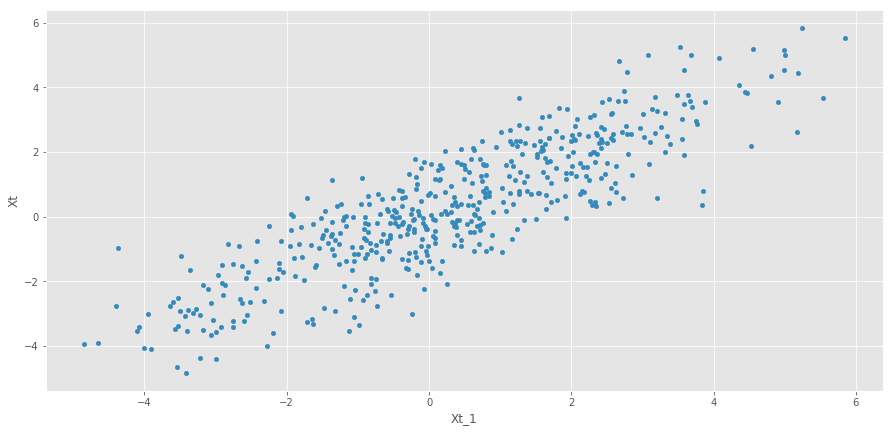

In [5]:
AR_1 = processAR1(sigma2=1,phi=0.9,n=500,x0=0)
plotTimeSeries(AR_1)
AR_1['Xt_1'] = AR_1['Xt'].shift(-1)
display(AR_1[:5])
AR_1.plot.scatter(x='Xt_1',y='Xt',figsize=(15,7))

Sample autocorrelations and partial autocorrelations using python.

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

lags=50 
AR_1_CFS = pd.DataFrame([acf(AR_1['Xt'],nlags=lags),\
                         pacf(AR_1['Xt'],nlags=lags)])\
             .transpose()
AR_1_CFS.columns = ['ACF_AR(1)','PACF_AR(1)']
AR_1_CFS[:10]

,ACF_AR(1),PACF_AR(1)
0,1.000000,1.000000
1,0.866661,0.868397
2,0.723962,-0.110803
3,0.589478,-0.048975
4,0.462138,-0.058772
5,0.352690,-0.015290
6,0.263917,-0.001476
7,0.201777,0.033276
8,0.147028,-0.033843
9,0.105709,0.004428


Correlogram and partial autocorrelogram using python

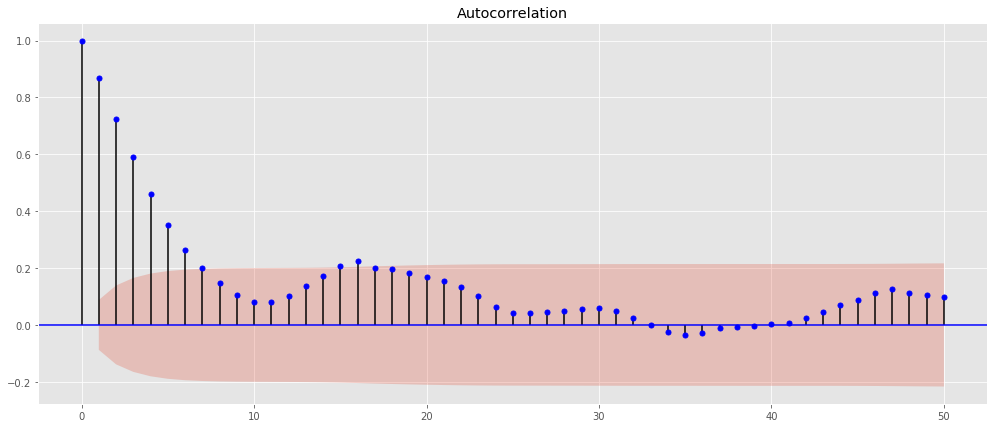

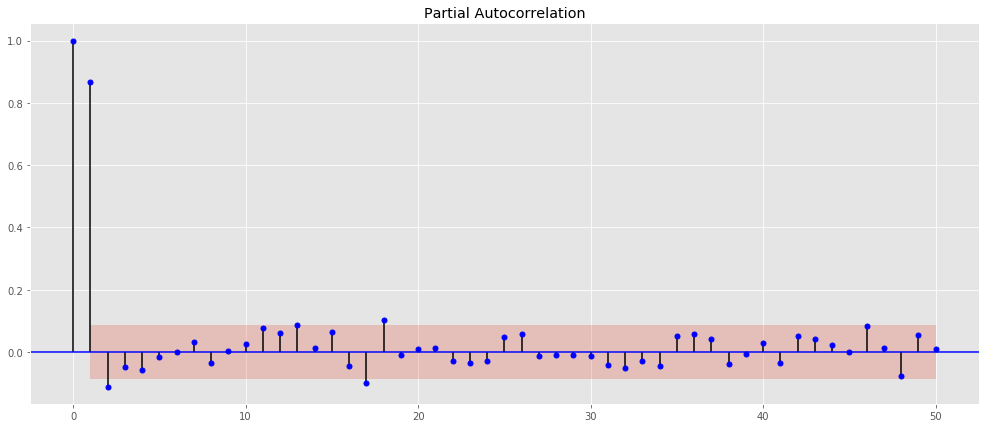

In [7]:
plt.style.use('ggplot')
plt.figsize=(15,10)
fig = plot_acf(AR_1['Xt'],lags=lags,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
fig = plot_pacf(AR_1['Xt'],lags=lags,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
plt.show()

Ljung box hypotesis test using python.

In [8]:
from statsmodels.stats.diagnostic import acorr_ljungbox
lags=50

values,Pvalues = acorr_ljungbox(AR_1['Xt'],lags=lags)
ljungbox_AR_1 = pd.DataFrame([values,Pvalues]).transpose()
ljungbox_AR_1.columns = ['statistic','p_value']
ljungbox_AR_1[:10]

,statistic,p_value
0,377.808171,3.733881e-84
1,641.973332,3.956054e-140
2,817.463142,7.060551e-177
3,925.540859,4.871460e-199
4,988.615592,1.751980e-211
5,1024.005786,5.743546e-218
6,1044.734440,2.595625e-221
7,1055.762755,1.367600e-222
8,1061.475134,9.504000e-223
9,1064.838044,2.001836e-222


## AR(2) model

___

For the second order autoregresive model, the model its given by:

$$
X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \varepsilon_t \\
$$



#### AR(2) model stationarity conditions:
The stationarity conditions for $AR(2)$ can añso expressed in terms od its parameter values:

$$
\begin{align*}
X_t - \phi_1 X_{t-1} - \phi_2 X_{t-2} = \varepsilon_t \\
(1-\phi B - \phi_2 B^2)X_t = \varepsilon_t \\
E[(1-\phi B - \phi_2 B^2)X_t] = E[\varepsilon_t] \\
(1-\phi B - \phi_2 B^2)E[X_t] = 0 \\
\end{align*}
$$

Lets $B_1, B_2$ the roots of $1-\phi B - \phi_2 B^2$.

$$
\begin{align*}
B_1 &= \frac{-\phi_1+\sqrt{\phi_1^2 + 4\phi_2 }}{2\phi_2} \\
B_2 &= \frac{-\phi_1-\sqrt{\phi_1^2 + 4\phi_2 }}{2\phi_2} \\
\end{align*}
$$

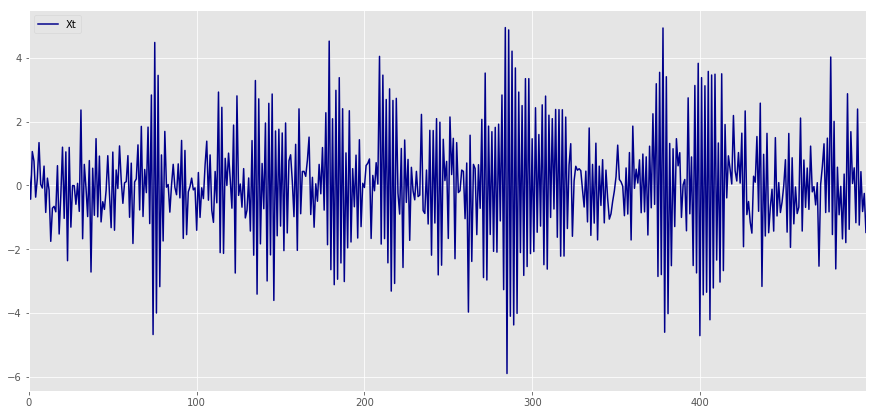

In [9]:
import statsmodels.api as sm
import numpy as np

ar = np.array([-0.6,.3])
ma = np.array([0, 0])
n = 500

np.random.seed(42)
Xt = sm.tsa.arma_generate_sample(np.r_[1, -ar],np.r_[1, ma],n,1)
AR_2 = pd.DataFrame(Xt)
AR_2.columns= ['Xt']

plt.style.use('ggplot')
plotTimeSeries(AR_2)

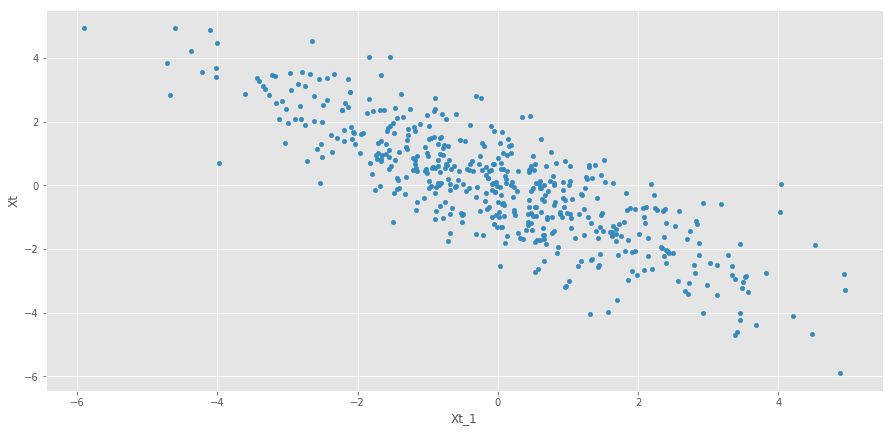

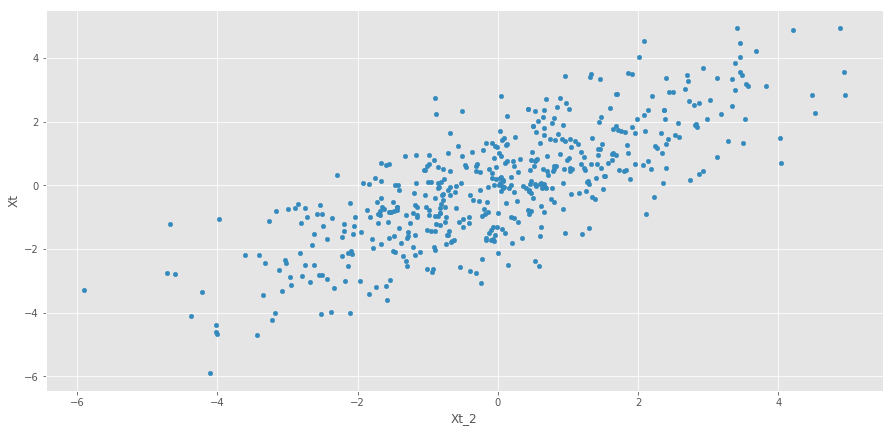

In [10]:
AR_2['Xt_1'] = AR_2['Xt'].shift(-1)
AR_2['Xt_2'] = AR_2['Xt'].shift(-2)
AR_2.plot.scatter(x='Xt_1',y='Xt',figsize=(15,7))
AR_2.plot.scatter(x='Xt_2',y='Xt',figsize=(15,7))

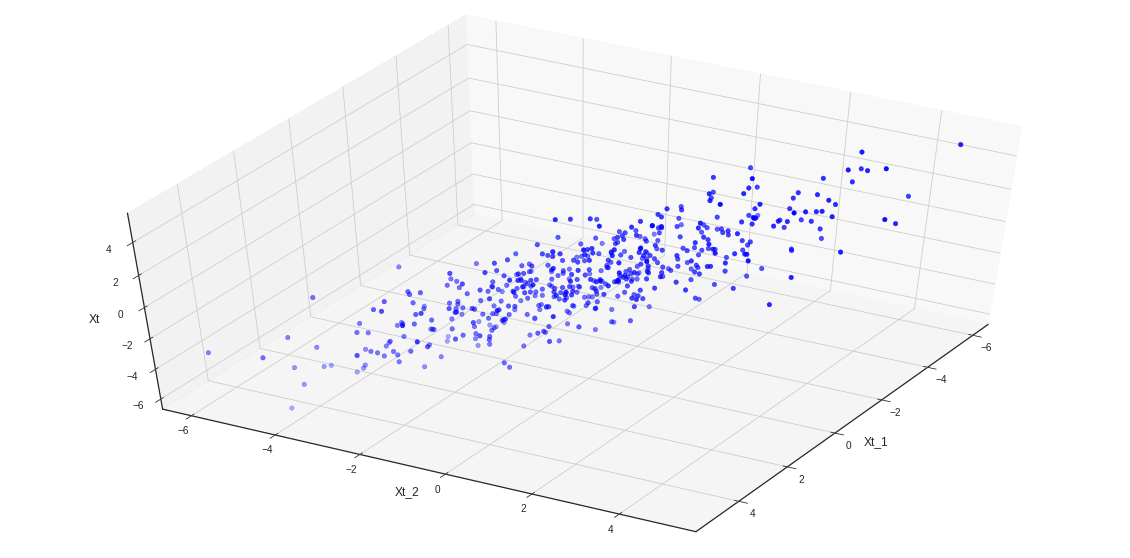

In [11]:
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('seaborn-white')
xt_1 =  AR_2[:len(AR_2)-2]['Xt_1'].transpose().values
xt_2 =  AR_2[:len(AR_2)-2]['Xt_2'].transpose().values
xt =  AR_2[:len(AR_2)-2]['Xt'].transpose().values

fig = plt.figure()
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xt_1, xt_2, xt,c='b')
ax.set_xlabel('Xt_1')
ax.set_ylabel('Xt_2')
ax.set_zlabel('Xt')
ax.view_init(50,30)
plt.show()

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

lags=50 
AR_2_CFS = pd.DataFrame([acf(AR_2['Xt'],nlags=lags),\
                         pacf(AR_2['Xt'],nlags=lags)])\
             .transpose()
AR_2_CFS.columns = ['ACF_AR(2)','PACF_AR(2)']
AR_2_CFS[:10]

,ACF_AR(2),PACF_AR(2)
0,1.000000,1.000000
1,-0.827517,-0.829175
2,0.772219,0.280951
3,-0.688699,0.008205
4,0.617785,-0.023420
5,-0.567731,-0.045445
6,0.526692,0.049055
7,-0.482306,0.006643
8,0.428247,-0.061155
9,-0.408982,-0.074199


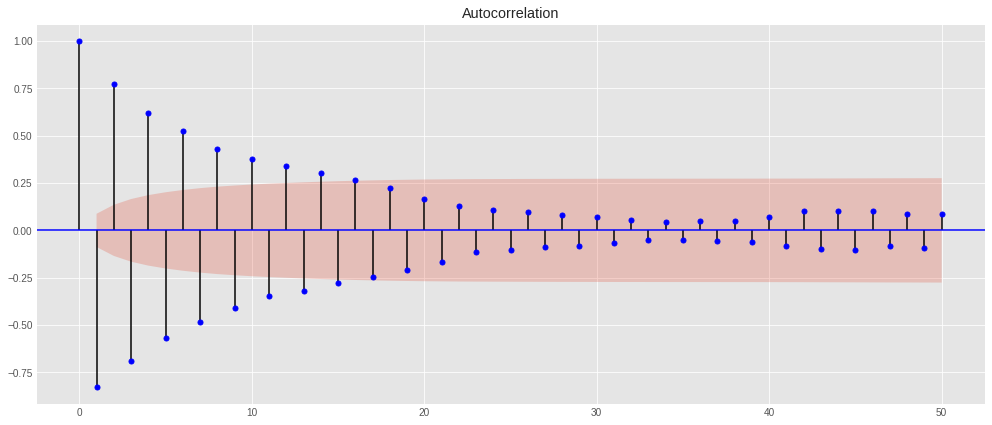

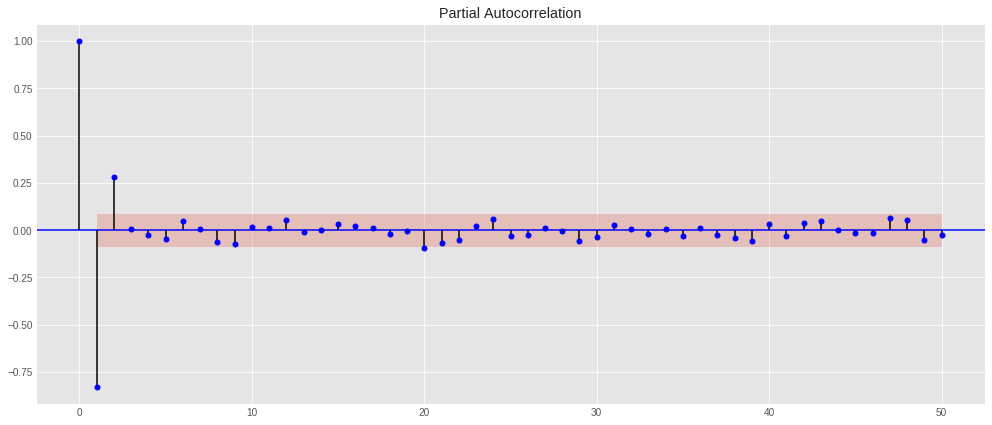

In [13]:
plt.style.use('ggplot')
plt.figsize=(15,10)
fig = plot_acf(AR_2['Xt'],lags=lags,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
fig = plot_pacf(AR_2['Xt'],lags=lags,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
plt.show()